# Lab 3
## Problem 1
### A)
>We definitely want to identify and throw out all the data when the thermal control system was not working (and the temperature was truly off from nominal). While it is possible to have an error in the thermometry such that the true temperature was fine, and we just had a wonky reading, in an abundance of caution we want to throw those values out too.

With no signal, we expect the background distribution to be Gaussian with a mean of 12 K and a standard deviation of 0.4 K. In order to remove anomalies from the meta-data, we ask: at what significance will we see the least amount of data data being included in the background distribution?

By looking at the bad data, we can construct integrals depending on whether it is below or above the mean.

For data below the mean, we integrate from neg infinity to a value x.
$$\int^t_{-\infty} \frac{1}{\sqrt{2\pi}}e^{-x^2/2} dx < 0.3%$$

For data above the mean, we integrate from a value x to pos infinity.
$$\int^{\infty}_t \frac{1}{\sqrt{2\pi}}e^{-x^2/2} dx < 0.3$$

Good Data
Mean:  11.99883350338493
SD:  0.40067611019971255
Range:  10.249522304576907 13.637302737828376

-------------------

below mean:  -5.000000000000001
below mean:  -4.249999999999997
below mean:  -24.750000000000004
below mean:  -30.0
below mean:  -30.0
above mean:  inf
above mean:  inf
above mean:  1.7499999999999984

-------------------

Sigma:  1 [68186, 31814]
Sigma:  3 [99744, 256]
Sigma:  5 [100000, 0]


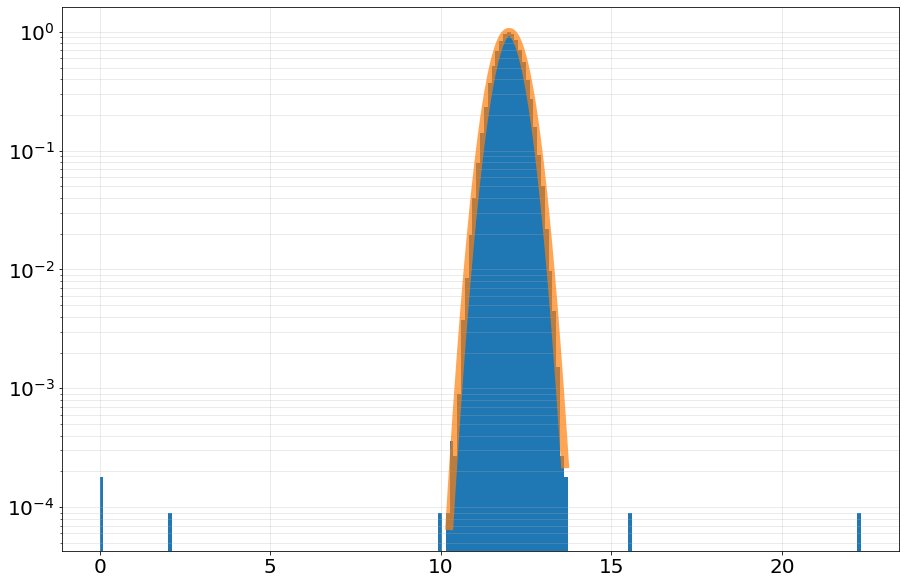

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, signal

fig1, ax1 = plt.subplots(1, 1, figsize=(15,10))
good = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
bad = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
d = np.append(good, bad)
ax1.hist(d,200, density=True)
ax1.tick_params(labelsize = 20)
ax1.set_yscale('log')

print("Good Data")
mean = np.mean(good)
print("Mean: ", mean)
std = np.std(good)
print("SD: ", std)
print("Range: ", np.amin(good), np.amax(good))

x = np.linspace(np.amin(good), np.amax(good), 1000)
ax1.plot(x, stats.norm.pdf(x, 12., 0.4),linewidth = 8,alpha = 0.7)
ax1.grid(True, 'both', alpha=0.3)

print("\n-------------------\n")
        
for n in bad:
    if (n < 12.):
        print("below mean: ", stats.norm.ppf(stats.norm.cdf(n, loc=12., scale=0.4)))
    else:
        print("above mean: ", stats.norm.ppf(stats.norm.cdf(n, loc=12., scale=0.4)))

print("\n-------------------\n")

for i in [1,3,5]:
    bad_count = 0
    good_count = 0
    for n in good:
        if abs(n - mean) > i*std:
            bad_count += 1
        else:
            good_count += 1        
    print("Sigma: ", i, [good_count, bad_count])
    
plt.show()

Looking at the bad data, we can assume data greater than 3 standard deviations away from the mean is a fault of the thermometry and within 3-sigma a fault of the thermal control system. The reasoning is that a faulty thermal control system would not cause the temperature to vary to drastically and so data greater than 3 standard deviations away are thermometry errors.

<div align='center'>Threshold of 1-sigma</div>

|              | True Temp | Bad Temp |
|--------------|-----------|----------|
| Good Measure |   68332   |   32688  |
| Bad Measure  |     8     |     0    |

&nbsp;

<div align='center'>Threshold of 3-sigma</div>

|              | True Temp | Bad Temp |
|--------------|-----------|----------|
| Good Measure |   99730   |    270   |
| Bad Measure  |     7     |     1    |

&nbsp;

<div align='center'>Threshold of 5-sigma</div>

|              | True Temp | Bad Temp |
|--------------|-----------|----------|
| Good Measure |   100000  |     0    |
| Bad Measure  |     6     |     2    |

### B)

In choosing 3$\sigma$ as the statistical threshold, the number of omissions contributes about 0.3% of all data and is a predicatble quantity following the empirical rule.

### C)

There is bad data being included with both thermal control system and thermometry errors which can be avoided by tightening the statistical threshold to within 3-sigma, specifically to 1.74 to eliminate all the specified bad data points.

## Problem 2
### 1.

Given a plot of 2D uncertainty in position, an rms(average magnitude) of 1, and Gaussian distributions, what distance in arcseconds would give us a significance of 5-sigma? Relating this question to the plot, at what (x,y) values does the true distance between images get a 5-sigma detection?

### 2.

Knowing that the magnitude of a 2D plot is given by $\sqrt{X^2+Y^2}$, we can find that the two Gaussian distributions become a Rayleigh distribution. We can then integrate with a right-tail measurement of the combined x and y distributions to get probabilities and convert to a significance. 

$$P(x,y) = \int^{\infty}_{1} \frac{x}{\sigma^2}e^{-x^2/2\sigma^2}$$

### 3.

We find that a distance of 4.48 arcseconds represents a 5-sigma detection. 

Sigma:  -4.4803146987717914


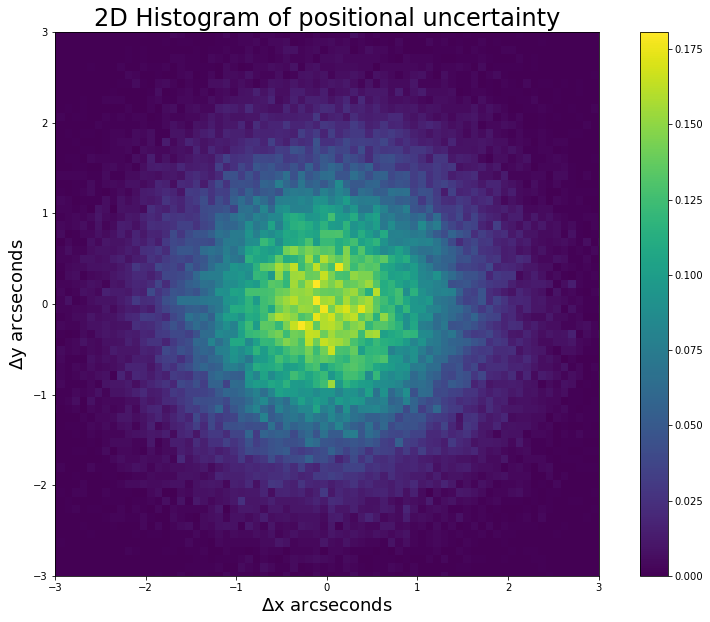

In [17]:
x_std = np.std(stats.norm.rvs( loc = 1, size = 100000))
y_std = np.std(stats.norm.rvs( loc = 1, size = 100000))
x = stats.norm.rvs( scale = 1, size = 100000)
y = stats.norm.rvs( scale = 1, size = 100000)
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape

fig2, ax1 = plt.subplots(1, 1, figsize=(15,10))
h = ax1.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax1.set_aspect('equal', 'box')
ax1.set_xlim([-3 , 3])
ax1.set_ylim([-3 , 3])
ax1.set_title("2D Histogram of positional uncertainty", fontsize = 24)
ax1.set_ylabel("$\Delta$y arcseconds", fontsize = 18)
ax1.set_xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax1)

prob = 1 - stats.rayleigh.cdf(5)
sig = stats.norm.ppf(prob)
print("Sigma: ", sig)

plt.show()

## Problem 3
### 1.

>Assume in a moon sized patch on the sky we normally have a cosmic ray rate of 1 cosmic ray per minute (arrivals are random in time). If we can observe where the moon is for 8 hours per night (not too close to the horizon) and we observe for 15 days and see 6800 cosmic rays, what is the signficance of our moon shadow detection?

With 6800 cosmic rays, that is 453.33 cosmic rays per day. Normally there is 480 cosmic rays per day(7200 cosmic rays per week). What is the significance of getting cosmic ray rates less than 453 rays per day over 15 days? i.e. what is the significance of measuring less than 6800 cosmic ray over 15 days? 

### 2.

We will assume a poisson distribution for the background.

$$\sum^{14}_{k=0} \int^{583.3}_{-\infty} pdf(x)*pdf(x-k) dx$$

### 3.

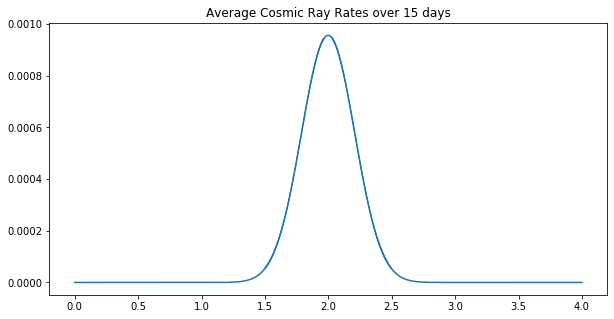

Sigma:  -4.750747965777188


In [16]:
fig3, ax1 = plt.subplots(1,1,figsize=(10,5))

xlin = np.arange(stats.poisson.ppf(0.01, 7200),
              stats.poisson.ppf(0.99, 7200))
out = stats.poisson.pmf(xlin, 7200)
in2 = out
for n in range(0,14):
    out = signal.fftconvolve(out, in2)
ax1.step(np.linspace(stats.poisson.ppf(0.01, 1), stats.poisson.ppf(0.99, 1), len(out)), out)
ax1.set_title("Average Cosmic Ray Rates over 15 days")
plt.show()

prob = stats.poisson.cdf(6800, 7200)
sig = stats.norm.ppf(prob)
print("Sigma: ", sig)

The lower the cosmic ray rate is, the higher the certainty of a moon, so the significance is measured on an interval from 0 to the mean i.e. the closer the rate is to 0, the more significant the detection is. Thus, we find a sigma of 4.75 left of the mean.